<a href="https://colab.research.google.com/github/hapava-angel/school_x_python_learning/blob/master/NlP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn import metrics

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


In [2]:
data = pd.read_csv('/content/train.csv')

In [3]:
data = data.dropna()
data.head
print(data.shape)
print(list(data.columns))

(5574, 2)
['sms', 'label']


In [4]:
data.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


0    4827
1     747
Name: label, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

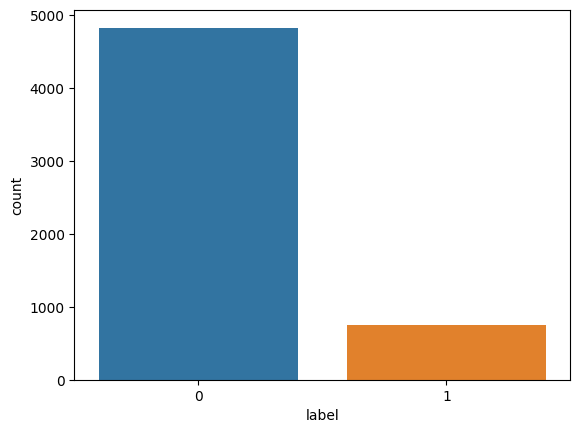

In [5]:
print(data['label'].value_counts())
sn.countplot(x='label', data=data)
plt.show

In [6]:
indices = data[data['label'] == 0].index[:1300]
data = data.drop(indices)
data['label'].value_counts()

0    3527
1     747
Name: label, dtype: int64

In [7]:
a = len(data[data['label']==0])
b = len(data[data['label']==1])
pct_of_a = a/(a+b)
print("Не спам:", pct_of_a*100)
pct_of_b = b/(a+b)
print("Спам:", pct_of_b*100)

Не спам: 82.52222742161909
Спам: 17.477772578380907


Аугументация

In [8]:
%pip install -q nlpaug

In [9]:
import nlpaug.augmenter.word as naw

In [10]:
aug = naw.SynonymAug(aug_src='wordnet')
aug_data = []
for i, row in data.iterrows():
    if row['label'] == 1:
        sentence = row['sms']
        augmented_sentence = aug.augment(sentence)
        augmented_sentence = ' '.join(augmented_sentence)
        aug_data.append({'label': row['label'], 'sms': augmented_sentence})

augmented_dataset = pd.DataFrame(aug_data)
augmented_dataset.to_csv('augmented.csv', index=False)

In [11]:
new_data = pd.read_csv('/content/augmented.csv')

In [12]:
new_data.head()

,label,sms
0,1,Free entry in 2 a wkly comprehensive to win FA...
1,1,FreeMsg Hey there darling it ' s been 3 workwe...
2,1,WINNER! ! As a respect network customer you ha...
3,1,Had your mobile xi calendar month surgery more...
4,1,"SIX chances to advance CASH! From 100 to 20, 0..."


In [13]:
data.head(-10)

,sms,label
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
5,FreeMsg Hey there darling it's been 3 week's n...,1
8,WINNER!! As a valued network customer you have...,1
9,Had your mobile 11 months or more? U R entitle...,1
11,"SIX chances to win CASH! From 100 to 20,000 po...",1
...,...,...
5559,No. I meant the calculation is the same. That ...,0
5560,"Sorry, I'll call later\n",0
5561,if you aren't here in the next &lt;#&gt; hou...,0
5562,Anything lor. Juz both of us lor.\n,0


In [14]:
dfa = new_data.append(data, ignore_index = True )


<ipython-input-14-7e27933fba0a>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfa = new_data.append(data, ignore_index = True )


In [15]:
dfa.head(-10)

,label,sms
0,1,Free entry in 2 a wkly comprehensive to win FA...
1,1,FreeMsg Hey there darling it ' s been 3 workwe...
2,1,WINNER! ! As a respect network customer you ha...
3,1,Had your mobile xi calendar month surgery more...
4,1,"SIX chances to advance CASH! From 100 to 20, 0..."
...,...,...
5006,0,No. I meant the calculation is the same. That ...
5007,0,"Sorry, I'll call later\n"
5008,0,if you aren't here in the next &lt;#&gt; hou...
5009,0,Anything lor. Juz both of us lor.\n


In [16]:
a = len(dfa[dfa['label']==0])
b = len(dfa[dfa['label']==1])
pct_of_a = a/(a+b)
print("Не спам:", pct_of_a*100)
pct_of_b = b/(a+b)
print("Спам:", pct_of_b*100)

Не спам: 70.24497112129058
Спам: 29.75502887870942


Предобработка текста

0    3527
1    1494
Name: label, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

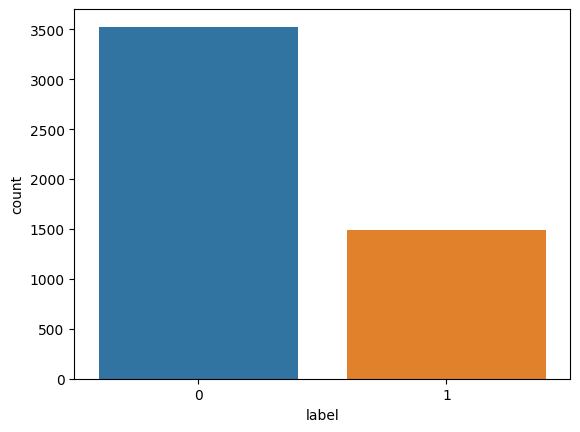

In [17]:
print(dfa['label'].value_counts())
sn.countplot(x='label', data=dfa)
plt.show

In [18]:
import nltk
import re
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import word_tokenize

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
def predobrabotka(data):
  corpus = []
  if isinstance(data, str): # для string object
    data = [data]

  for i in range(len(data)):
    data_sms = re.sub('[^a-zA-Z]', ' ', data[i]).lower()
    # print(data_sms)
    tokens = nltk.word_tokenize(data_sms)
    stop = stopwords.words('english')
    cleaned_tokens = [word for word in tokens if not word in stop]
    tags = ' '.join(cleaned_tokens)
    # print(tags)
    corpus.append(tags)
  return corpus
corpus = predobrabotka(dfa['sms'])
print(corpus)
dfa = dfa.assign(tokenized=corpus)

['free entry wkly comprehensive win fa loving cup final tkts twenty first may text fa entry question std txt pace c mho apply', 'freemsg hey darling workweek word back vitamin comparable sport information technology still tb ok std chgs mail rcv', 'winner respect network customer selected receivea prize reward take song title code kl valid hours solely', 'mobile xi calendar month surgery uracil r entitled update late colour mobiles camera free call mobile update co free', 'six chances advance cash pounds txt csh post price p hour interval days sixteen tsandcs apply reply hl information', 'urgent advance hebdomad free membership award jackpot txt word title tetraiodothyronine c www dbuk net lccltd pobox ldnw rw', 'xxxmobilemovieclub use cite get wap liaison adjacent txt substance click hypertext transfer protocol wap xxxmobilemovieclub com n qjkgighjjgcbl', 'england v makedonija dont omit goals team news show txt ur national squad eg england try welt scotland txt poboxox w wq xvi', 'tha

In [22]:
dfa.head()

,label,sms,tokenized
0,1,Free entry in 2 a wkly comprehensive to win FA...,free entry wkly comprehensive win fa loving cu...
1,1,FreeMsg Hey there darling it ' s been 3 workwe...,freemsg hey darling workweek word back vitamin...
2,1,WINNER! ! As a respect network customer you ha...,winner respect network customer selected recei...
3,1,Had your mobile xi calendar month surgery more...,mobile xi calendar month surgery uracil r enti...
4,1,"SIX chances to advance CASH! From 100 to 20, 0...",six chances advance cash pounds txt csh post p...


In [23]:
X = dfa['tokenized']
Y = dfa['label']

Эмбэдинг

In [24]:
X_train,X_test,y_train,y_test = train_test_split (X, Y, test_size=0.3,random_state=32)
print(y_train.value_counts())

0    2450
1    1064
Name: label, dtype: int64


In [25]:
vector = CountVectorizer()
tfidf_transformer = TfidfTransformer()
X_train = vector.fit_transform(X_train)
X_train = tfidf_transformer.fit_transform(X_train)
X_test = vector.transform(X_test)
X_test = tfidf_transformer.transform(X_test)

In [26]:
print(y_test.value_counts())

0    1077
1     430
Name: label, dtype: int64


## Выбор классической модели

In [27]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [28]:
svc = SVC(probability=True)
neighbors = KNeighborsClassifier()
multinomial = MultinomialNB()
decisiontree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
regression = LogisticRegression()

In [29]:
dict_of_classic_models = {'SVC' : svc,'KNeighborsClassifier' : neighbors, 'MultinomialNB': multinomial, 'DecisionTreeClassifier': decisiontree, 'LogisticRegression': regression, 'RandomForestClassifier': randomforest}

In [30]:
for k,c in dict_of_classic_models.items():
  c.fit(X_train, y_train)

In [31]:
def train(clf, train_inputs, train_outputs):
    clf.fit(train_inputs, train_outputs)

In [32]:
pred_scores = []
conf_matrix = []
report = []
for k,c in dict_of_classic_models.items():
    train(c, X_train, y_train)
    pred = c.predict(X_test)
    pred_scores.append((k, [accuracy_score(y_test , pred)]))
    conf_matrix.append((k, metrics.confusion_matrix(y_test, pred)))
    report.append((k, classification_report(y_test, pred)))

for k, matrix in conf_matrix:
  # print(matrix)
  print(f'{k}:\n'
        f'Истинно-положительных предсказаний: {matrix[0][0]}\n',
        f'Истинно-отрицательные прогнозы: {matrix[0][1]}\n',
        f'Ложно-положительные прогнозы: {matrix[1][0]}\n',
        f'Ложно-отрицательные прогнозы: {matrix[1][1]}')

for score in pred_scores:
  print(score)


SVC:
Истинно-положительных предсказаний: 1074
 Истинно-отрицательные прогнозы: 3
 Ложно-положительные прогнозы: 19
 Ложно-отрицательные прогнозы: 411
KNeighborsClassifier:
Истинно-положительных предсказаний: 1076
 Истинно-отрицательные прогнозы: 1
 Ложно-положительные прогнозы: 249
 Ложно-отрицательные прогнозы: 181
MultinomialNB:
Истинно-положительных предсказаний: 1070
 Истинно-отрицательные прогнозы: 7
 Ложно-положительные прогнозы: 25
 Ложно-отрицательные прогнозы: 405
DecisionTreeClassifier:
Истинно-положительных предсказаний: 1049
 Истинно-отрицательные прогнозы: 28
 Ложно-положительные прогнозы: 38
 Ложно-отрицательные прогнозы: 392
LogisticRegression:
Истинно-положительных предсказаний: 1070
 Истинно-отрицательные прогнозы: 7
 Ложно-положительные прогнозы: 48
 Ложно-отрицательные прогнозы: 382
RandomForestClassifier:
Истинно-положительных предсказаний: 1073
 Истинно-отрицательные прогнозы: 4
 Ложно-положительные прогнозы: 24
 Ложно-отрицательные прогнозы: 406
('SVC', [0.9854014

In [33]:
for k, rep in report:
   print(f'{k}\n',
         f'{rep}')

SVC
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1077
           1       0.99      0.96      0.97       430

    accuracy                           0.99      1507
   macro avg       0.99      0.98      0.98      1507
weighted avg       0.99      0.99      0.99      1507

KNeighborsClassifier
               precision    recall  f1-score   support

           0       0.81      1.00      0.90      1077
           1       0.99      0.42      0.59       430

    accuracy                           0.83      1507
   macro avg       0.90      0.71      0.74      1507
weighted avg       0.86      0.83      0.81      1507

MultinomialNB
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1077
           1       0.98      0.94      0.96       430

    accuracy                           0.98      1507
   macro avg       0.98      0.97      0.97      1507
weighted avg       0.98      0.9

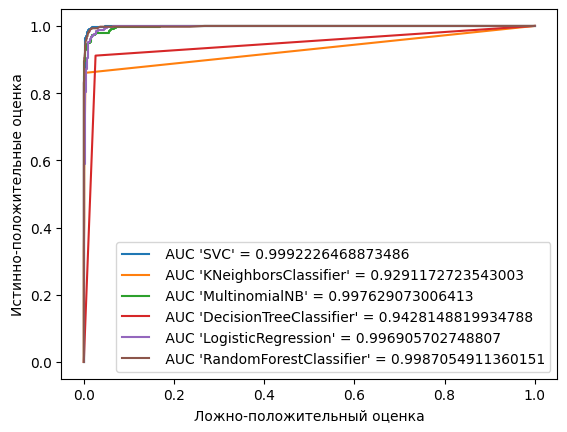

In [34]:
plt.figure()
for model_name, model in dict_of_classic_models.items():
  y_pred_proba = model.predict_proba(X_test)[::,1]
  fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
  auc = metrics.roc_auc_score(y_test, y_pred_proba)
  plt.plot (fpr,tpr,label= f" AUC '{model_name}' = "+str(auc))
  plt.legend(loc=4)
  plt.xlabel("Ложно-положительный оценка")
  plt.ylabel("Истинно-положительные оценка")
plt.show()

In [45]:
# sample = "thanks for all your answers guys i know i should have checked the rsync manual but i would rather ge..."
# sample = 'You’ve been selected to receive a free gift!'
# sample = "Congratulations! You've been selected for a free vacation. Click here to claim your prize and enjoy a luxury getaway to a tropical paradise. Don't miss out!"
sample = "Hello [Your Name], we're excited to inform you that you've won a complimentary vacation package to a beautiful destination. Click the link to redeem your prize and start planning your dream getaway. We can't wait for you to experience the luxury and relaxation of this amazing trip!"
tokenized_sample = predobrabotka(sample)
X = vector.transform(tokenized_sample)
X = tfidf_transformer.transform(X)
X_test
for k,c in dict_of_classic_models.items():
  pred = c.predict(X)
  print(k, pred)


SVC [0]
KNeighborsClassifier [0]
MultinomialNB [1]
DecisionTreeClassifier [0]
LogisticRegression [0]
RandomForestClassifier [1]


Я протестила несколько примеров. Первый был не спамом и модель определила правильно, а затем я стала давать спамовые сообщения, но всё менее очевидные, и как можно видеть по выводам, только MultinomialNB и RandomForestClassifier правильно определили label.
 Хотя цифры показывали, что наиболее точными моедли - это SVC и RandomForestClassifier.
Таким образом самая точная модель-  RandomForestClassifier.

## Нейронная сеть

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable

In [104]:
X = dfa.sms.values
Y = dfa.label.values

In [105]:
from keras.preprocessing.text import Tokenizer
t = Tokenizer(num_words=1000)
t.fit_on_texts(X)
X = t.texts_to_matrix(X, mode='tfidf')

In [106]:
print(X)

[[0.         2.78555652 0.         ... 0.         0.         0.        ]
 [0.         2.24736946 1.51920367 ... 0.         0.         0.        ]
 [0.         2.24736946 1.51920367 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.32733261 0.         ... 0.         0.         0.        ]
 [0.         1.32733261 0.         ... 0.         0.         0.        ]]


In [38]:
X.shape

(5021, 1000)

In [39]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Model, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.l2 = nn.Linear(hidden_size , hidden_size)
        self.l3 = nn.Linear(hidden_size, 2)

    def forward(self, x):
        out = F.relu(self.l1(x))
        out = F.relu(self.l2(out))
        out = self.l3(out)
        return out


In [40]:
input_size = 1000
hidden_size = 128
output_size = 2
model = Model(input_size, hidden_size, output_size)
# print(model)

In [41]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, shuffle=True, random_state=34)

In [42]:
Y_test

array([1, 0, 0, ..., 0, 0, 0])

In [43]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

Тренировка модели














In [44]:
epochs = 2000
x_train = Variable(torch.from_numpy(X_train)).float()
y_train = Variable(torch.from_numpy(Y_train)).long()
model.train()
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    pred = torch.max(y_pred, 1)[1]
    predict = pred.data.numpy()
    accuracy = accuracy_score(Y_train, predict)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 100 == 0:
      print(f'Эпоха [{epoch + 1}/{epochs}], Потери: {loss}, Accuracy: {accuracy}')
print('Итоговая точность', accuracy)


Эпоха [100/2000], Потери: 0.6091427803039551, Accuracy: 0.7033200531208499
Эпоха [200/2000], Потери: 0.569009006023407, Accuracy: 0.7033200531208499
Эпоха [300/2000], Потери: 0.49652695655822754, Accuracy: 0.7264276228419655
Эпоха [400/2000], Потери: 0.35641369223594666, Accuracy: 0.9248339973439575
Эпоха [500/2000], Потери: 0.2177056223154068, Accuracy: 0.9628154050464808
Эпоха [600/2000], Потери: 0.14212463796138763, Accuracy: 0.9752988047808765
Эпоха [700/2000], Потери: 0.10344074666500092, Accuracy: 0.9811420982735723
Эпоха [800/2000], Потери: 0.08092547953128815, Accuracy: 0.9851261620185923
Эпоха [900/2000], Потери: 0.06617611646652222, Accuracy: 0.9877822045152722
Эпоха [1000/2000], Потери: 0.0556652806699276, Accuracy: 0.9888446215139443
Эпоха [1100/2000], Потери: 0.04772264137864113, Accuracy: 0.9904382470119522
Эпоха [1200/2000], Потери: 0.04150513932108879, Accuracy: 0.9915006640106242
Эпоха [1300/2000], Потери: 0.036502305418252945, Accuracy: 0.9928286852589642
Эпоха [1400/

In [46]:
epochs = 200
model.eval()
x_test = Variable(torch.from_numpy(X_test)).float()
y_test = Variable(torch.from_numpy(Y_test)).long()
net_out = model(x_test)
for epoch in range(epochs):
    with torch.no_grad():
        y_pred = model(x_test)
        loss = criterion(y_pred, y_test)
        pred = torch.max(y_pred, 1)[1]
        prediction = pred.data.numpy()
        accuracy = accuracy_score(Y_test, prediction)
print(prediction)
print(Y_test)
print(f' Потери: {loss}, Accuracy: {accuracy}')


[1 0 0 ... 0 0 0]
[1 0 0 ... 0 0 0]
 Потери: 0.06061660125851631, Accuracy: 0.981687898089172


In [114]:
# a = ["thanks for all your answers guys i know i should have checked the rsync manual but i would rather ge..."]
# b = ["You’ve been selected to receive a free gift!"]
# c = [ "Congratulations! You've been selected for a free vacation. Click here to claim your prize and enjoy a luxury getaway to a tropical paradise. Don't miss out!"]
# d = ["Hello [Your Name], we're excited to inform you that you've won a complimentary vacation package to a beautiful destination. Click the link to redeem your prize and start planning your dream getaway. We can't wait for you to experience the luxury and relaxation of this amazing trip!"]
docs = ["thanks for all your answers guys i know i should have checked the rsync manual but i would rather ge...",
		"You’ve been selected to receive a free gift!",
		"Congratulations! You've been selected for a free vacation. Click here to claim your prize and enjoy a luxury getaway to a tropical paradise. Don't miss out!",
		"Hello [Your Name], we're excited to inform you that you've won a complimentary vacation package to a beautiful destination. Click the link to redeem your prize and start planning your dream getaway. We can't wait for you to experience the luxury and relaxation of this amazing trip!"]
# create the tokenizer
t = Tokenizer()

t.fit_on_texts(docs)

encoded_docs = t.texts_to_matrix(docs, mode='binary')
print(encoded_docs)
pred = model(torch.tensor(encoded_docs, dtype=torch.double))
print(pred)

[[0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


RuntimeError: ignored

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

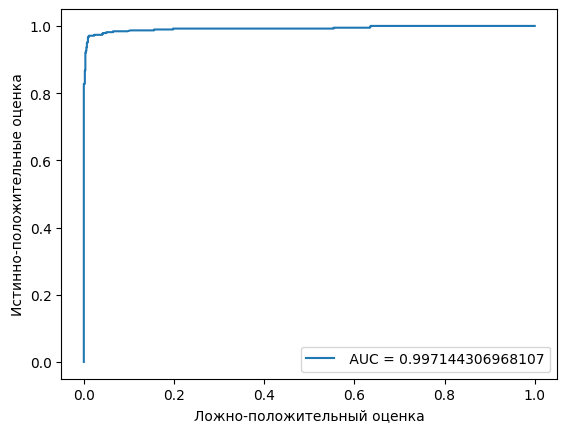

In [ ]:
softmax = F.softmax(net_out, dim=1)
probabilities = softmax.detach().cpu().numpy()
auc_score = roc_auc_score(Y_test, probabilities[:, 1])
fpr, tpr, _ = roc_curve(Y_test, probabilities[:, 1])
plt.plot (fpr,tpr,label= f" AUC = "+str(auc))
plt.xlabel("Ложно-положительный оценка")
plt.ylabel("Истинно-положительные оценка")
plt.legend(loc=4)
plt.show()

## Трансформер

In [1]:
%pip install -q accelerate

In [2]:
import accelerate

In [14]:
accelerate.__version__

'0.25.0'

In [15]:
%pip install transformers

In [16]:
import transformers as trfm

In [17]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

In [18]:
from transformers import Trainer, TrainingArguments

In [57]:
from torch.utils.data import Dataset, DataLoader

In [19]:
tokenizer = AutoTokenizer.from_pretrained('distilroberta-base')
model = AutoModelForSequenceClassification.from_pretrained('distilroberta-base')

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [140]:
from datasets import Dataset

In [192]:
train, test = train_test_split(dfa, shuffle=True,  random_state=34)

In [193]:
data_dict = train.to_dict(orient='list')

In [194]:
datatrain = Dataset.from_dict(data_dict)

In [195]:
d_dict = test.to_dict(orient='list')

In [196]:
datatest = Dataset.from_dict(d_dict)
print(datatest[:10])

{'label': [1, 0, 0, 0, 0, 1, 0, 0, 0, 0], 'sms': ['Bored housewives! Chat n day of the month now! 0871750. 77. 11! BT - national rate 10p / minute exclusively from landlines!', 'Moji i love you more than words. Have a rich day\n', "Sorry, I'll call later In meeting.\n", 'Oh... Lk tt den we take e one tt ends at cine lor... Dun wan yogasana oso can... \n', 'Gettin rdy to ship comp\n', 'URGENT! We are trying to contact U. Todays draw shows that you have won a £2000 prize GUARANTEED. Call 09066358361 from land line. Claim Y87. Valid 12hrs only\n', 'I am in bus on the way to calicut\n', 'S da..al r above  &lt;#&gt;\n', "I'll text carlos and let you know, hang on\n", 'Only just got this message, not ignoring you. Yes, i was. Shopping that is\n']}


In [197]:
def tokenize_function(examples):
    return tokenizer(examples['sms'], padding='max_length', truncation=True, max_length = 512)
train = datatrain.map(tokenize_function, batched=True)
train
test = datatest.map(tokenize_function, batched=True)
test
# inputs_train = tokenize_function(X_train)
# inputs_train['labels'] = y_train
# inputs_test = tokenize_function(X_test)
# inputs_test['labels'] = y_test
# tokenizer(X_train[:1])

# print(tokenized)
# print(inputs_train.keys())

Map:   0%|          | 0/3765 [00:00<?, ? examples/s]

Map:   0%|          | 0/1256 [00:00<?, ? examples/s]

Dataset({
    features: ['label', 'sms', 'input_ids', 'attention_mask'],
    num_rows: 1256
})

In [198]:
train = train.rename_column('label', 'labels')

In [222]:
torch.tensor(train['labels'])

tensor([0, 1, 0,  ..., 0, 0, 1])

In [228]:
train

Dataset({
    features: ['labels', 'sms', 'input_ids', 'attention_mask'],
    num_rows: 3765
})

In [210]:
class_weights = torch.tensor(1 - (dfa["label"].value_counts().sort_index() / len(dfa))).float()
class_weights

tensor([0.2976, 0.7024])

In [229]:
class Trainer(Trainer):
  def compute_loss(self, model, inputs, return_outputs=False):
    outputs = model(**inputs)
    logits = outputs.get("logits")
    labels = inputs.get ("labels")
    loss_func = nn.CrossEntropyLoss(class_weights)
    loss = loss_func(logits, labels)
    return (loss, outputs) if return_outputs else loss

In [26]:
%pip install -q evaluate

In [200]:
import evaluate
import numpy as np
metric = evaluate.load("f1")

def compute_metrics(Trainer):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return metric.compute(predictions=predictions, references=labels, average="weighted")

In [217]:
# batch_size = 64
output_dir = "outputs"
training_args = TrainingArguments(output_dir=output_dir,
                                  num_train_epochs=2
                                  # num_train_epochs=5,
                                  # per_device_train_batch_size=batch_size,
                                  # weight_decay=0.01,
                                  # evaluation_strategy="epoch"
)
# training_args = TrainingArguments(
#     output_dir='results',
# )

In [230]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train,
    # eval_dataset=test
)


In [ ]:
trainer.train()

Step,Training Loss


In [ ]:
# def train_model(model, input_ids_train, attention_mask_train, labels_train):
#     model.train()
#     batch_size = 32
#     for i in range(0, len(input_ids_train), batch_size):
#         input_ids_batch = input_ids_train[i:i+batch_size]
#         attention_mask_batch = attention_mask_train[i:i+batch_size]
#         labels_batch = labels_train[i:i+batch_size]
#         outputs = model(input_ids_batch, attention_mask_batch, labels_batch)
#         loss = outputs.loss
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#     return loss

# loss = train_model(model, input_ids_train, attention_mask_train, labels_train)

NameError: ignored

In [ ]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor([self.labels[idx]])
        return item

    def __len__(self):
        return len(self.labels)

In [ ]:
model.eval()

# Evaluate loss and accuracy on the test set
with torch.no_grad():
    test_outputs = model(input_ids=input_ids_test, attention_mask=attention_mask_test, labels=labels_test)
    test_loss = test_outputs.loss
    predicted_labels = torch.argmax(test_outputs.logits, dim=1)
    accuracy = (predicted_labels == labels_test).sum().item() / len(labels_test)

print(f"Потери: {test_loss:.4f}, Accuracy: {accuracy * 100:.2f}%")